# **Cálculo simbólico**

Para realizar cálculos analíticos en Python, se debe importar la libreria **sympy**.

In [1]:
import sympy as smp

Primero vamos a escribir una función $f$ en forma simbólica. Por ejemplo, definamos en forma simbólica las funciones: $f(x)=\ln\left(\frac{x}{x^2+1}\right)$ y $g(x,y)=x^2+y^2-xy$.

In [2]:
x = smp.symbols('x')
# definimos la función f(x)
f = smp.log(x/(x**2+1))
# definimos la función g(x,y)
y = smp.symbols('y')
g = x**2 + y**2 - x*y

Ahora, para evaluar la función se usa la función **subs**, de la siguiente forma:

In [3]:
# f(5)
f5 = f.subs(x,5)
f5

log(5/26)

Si se desea que imprima el valor decimal del número real escribimos al final **.n()** (aproximación). Otra opción es usar la opción **.doit()** (escribir en forma racional)

In [4]:
f.subs(x,5).n()

-1.64865862558738

Si deseamos redondear a 4 cifras decimales, imprimimos el resultados así:

In [5]:
f5=f.subs(x,5).n()
print(f'f(5)={f5:.4f}')

f(5)=-1.6487


## Ecuaciones algebraicas

Para resolver ecuaciones algebraicas usamos *solveset*.

Por ejemplo, vamos a resolver la ecuación $$3x^3-16x^2+23x-6=0$$

In [67]:
from sympy.solvers.solveset import solveset #importamos solveset

solveset(3*x**3-16*x**2+23*x-6,x)

{1/3, 2, 3}

## Límites

Para resolver límites se usa la función **limit**. Por ejemplo, vamos a calcular los siguientes límites:
$$
\lim_{x\to -2}{\frac{x^2-2x-8}{x^3+8}}
$$

In [6]:
L1=(x**2-2*x-8)/(x**3+8)
a=-2
# límite
smp.limit(L1,x,a)

-1/2

$$
\lim_{x\to 0^{-}}{\frac{x}{\sqrt{1-\cos{x}}}}
$$

In [7]:
L2=x/smp.sqrt(1-smp.cos(x))
smp.limit(L2,x,0,dir='-')

-sqrt(2)

$$
\lim_{x\to-\infty}{\frac{3x-1}{1-x}}
$$

In [8]:
smp.limit((3*x-1)/(1-x),x,-smp.oo)

-3

## Derivadas

Para calcular derivadas usamos la función **diff**.

Por ejemplo, vamos a calcular la derivada de las siguientes funciones:

$$
\frac{d}{dx}\left(\frac{1-x}{1+x}\right)
$$

In [9]:
smp.diff((1+x)/(1-x),x)

1/(1 - x) + (x + 1)/(1 - x)**2

In [10]:
#OTRA FORMA
fun1=(1+x)/(1-x)
fun1.diff(x) #aqui se puede aplicar diff al objeto fun1

1/(1 - x) + (x + 1)/(1 - x)**2

Cuando el resultado no esta simplificado, podemos usar la función **simplify**.

In [11]:
d1=smp.diff((1+x)/(1-x),x)
smp.simplify(d1)

2/(x - 1)**2

### Derivadas parciales

Para calcular las **derivadas parciales** se usa la misma función **diff**. Por ejemplo, vamos a calcular $\frac{\partial g}{\partial x}$ y $\frac{\partial g}{\partial y}$ de la función $g(x,y)$ que se guardo anteriormente.

In [12]:
smp.diff(g,x)

2*x - y

In [13]:
smp.diff(g,y)

-x + 2*y

In [37]:
#Otra forma para la derivada de g respecto a y
g.diff(y)

-x + 2*y

### Derivadas de orden superior

Para calcular la derivada de orden $n$ de una función $f$ respecto a $x$, se usa la sintaxis **diff(f,x,n)**. Por ejemplo, calculamos la quinta derivada de la funciòn $\ln{x}$.

In [14]:
smp.diff(smp.log(x),x,5)

24/x**5

In [43]:
#aquí como calcular las derivadas de segundo orden para g(x,y)
gxx=smp.diff(g,x,2)
gxy=smp.diff(g,x,y)
gyx=smp.diff(g,y,x)
gyy=smp.diff(g,y,2)
J=smp.Matrix([[gxx,gxy],[gyx,gyy]]) #matriz Jacobiana
J

Matrix([
[ 2, -1],
[-1,  2]])

## Sumatorias y series

$$\sum_{i=2}^{50}{\frac{i^2}{i-1}}$$

In [15]:
i = smp.symbols('i')
# definimos la función f(i)
fi = i**2/(i-1)
smp.summation(fi,(i,2,50)).n()

1327.47920533833

$$\sum_{i=1}^{+∞}{\frac{1}{i^2}}$$

In [16]:
smp.summation(1/i**2,(i,1,+smp.oo))

pi**2/6

## Integrales

In [28]:
D = y*smp.exp(x)+smp.cos(y)
D

y*exp(x) + cos(y)

Fomas para calcular la integral de la función $D$

In [29]:
smp.integrate(D,x) #calcula la integral indefinida respecto a x

x*cos(y) + y*exp(x)

In [30]:
D.integrate(x) #otra forma para calcular la integral respecto a x

x*cos(y) + y*exp(x)

In [31]:
D.integrate(y) #integral respecto a y

y**2*exp(x)/2 + sin(y)

In [32]:
D.integrate(x,y) #integral conjunta

x*sin(y) + y**2*exp(x)/2

In [33]:
D.integrate(y,x) #otra forma

x*sin(y) + y**2*exp(x)/2

In [36]:
D.integrate(x,y,y) #aqui inicia a integrar de izquierda a derecha

-x*cos(y) + y**3*exp(x)/6

In [49]:
yD=smp.Integral(D,y) #otra forma
yD, yD.doit() # en yD se asocia la integral sin resolver y en la otra componente ya esta calculada

(Integral(y*exp(x) + cos(y), y), y**2*exp(x)/2 + sin(y))

In [46]:
multiple = smp.Integral(D,(x,0,y),(y,0,1)) #integral iterada
multiple

Integral(y*exp(x) + cos(y), (x, 0, y), (y, 0, 1))

In [47]:
multiple_sol = multiple.doit()
multiple_sol.n()

0.881773290676036

In [48]:
#Otra forma
smp.integrate(D,(x,0,y),(y,0,1)).n()

0.881773290676036

## Ecuaciones diferenciales ordinarias

A continuación hallaremos la solución general de la EDO:
$$z'+2xz=0$$

Para ello usamos la función *dsolve*

In [59]:
from sympy.solvers.ode import dsolve #importamos dsolve

#Ahora definimos la función z=z(x) y la EDO
z = smp.Function('z')
edo1 = smp.Eq(z(x).diff(x)+2*z(x)*x,0)
edo1

Eq(2*x*z(x) + Derivative(z(x), x), 0)

In [60]:
#Ahora resolvemos la edo1
sol1 = dsolve(edo1,z(x))
sol1

Eq(z(x), C1*exp(-x**2))

De manera similar podemos resolver la siguientes EDO de segundo orden:
$$z''+z=\sin{x}$$

In [61]:
edo2 = smp.Eq(z(x).diff(x,2)+z(x),smp.sin(x))
edo2

Eq(z(x) + Derivative(z(x), (x, 2)), sin(x))

In [64]:
#resolvemos edo2
sol2 = dsolve(edo2,z(x))
sol2

Eq(z(x), C2*sin(x) + (C1 - x/2)*cos(x))

Ahora resolvemos el PVI:
$$z''+z=\sin{x}, \ z(0)=1,\ z'(0)=-1$$

In [74]:
#resolvemos el PVI usando la edo2
sol_pvi = dsolve(edo2, z(x), ics={z(0): 1, z(x).diff(x).subs(x, 0): -1})
sol_pvi

Eq(z(x), (1 - x/2)*cos(x) - sin(x)/2)

## Gráficos con funciones simbólicas

Para realizar gráficos sobre funciones simbólicas debemos importar *matplotlib* y luego *plotting*.


In [82]:
import matplotlib.pyplot as plt
from sympy.plotting import plot
%matplotlib inline

Vamos a graficar la función $$y=\sin{x}$$ con sus tres primeros polinomios de Taylor: $p_1(x)=x$, $p_2(x)=x-\frac{x^3}{6}$ y $p_3(x)=x-\frac{x^3}{6}+\frac{x^5}{120}$ con $x\in[-3,3]$

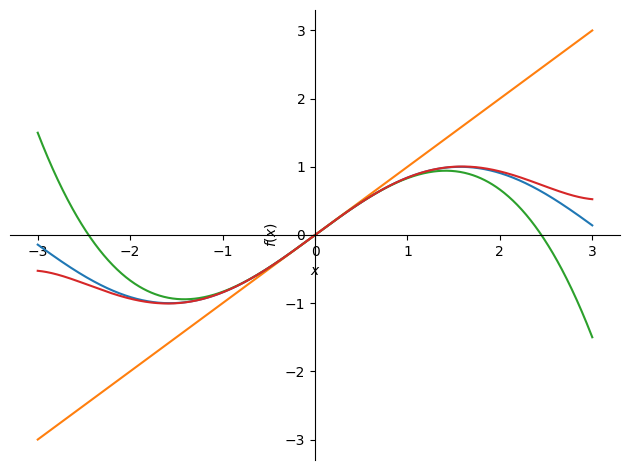

In [83]:
plot(smp.sin(x), x, x-x**3/6, x-x**3/6+x**5/120, (x,-3,3))

Ahora vamos a graficar el paraboloide hiperbólico $z=x^2-y^2$ en el rectángulo $[-2,2]\times[-2,2]$

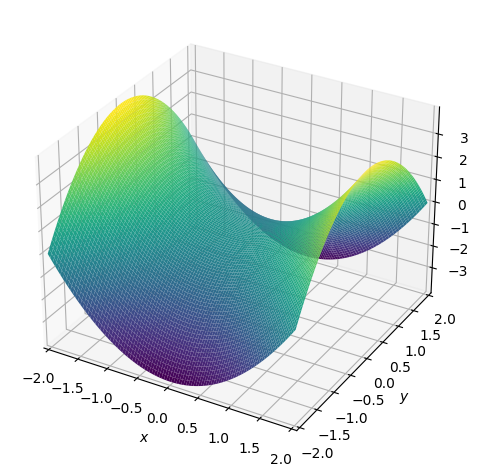

In [101]:
from sympy.plotting import plot3d #importamos plot3d
#ahora cambiamos el angulo de la vista
plot3d(x**2-y**2, (x,-2,2), (y,-2,2), view=(20,20))

# Observación.
Si no se quiere realizar gráficos en forma simbólica, sino de forma numérica; es posible pasar una función de simbólica a numérica.

Por ejemplo, vamos a definir la función $h(t)=3t-\sin{t}$ de forma simbólica y la pasaremos a forma numérica y la graficamos usando *matplotlib*

In [107]:
t = smp.symbols('t')
h = 3*t - smp.sin(t)
#Ahora la pasamos a forma numérica con lambdify
h_num = smp.lambdify(t,h)
#y calculamos h(2)
h_num(2)

5.090702573174318

Ahora importamos las librerias *numpy* y *matplotlib.pyplot*

In [108]:
import numpy as np
import matplotlib.pyplot as plt

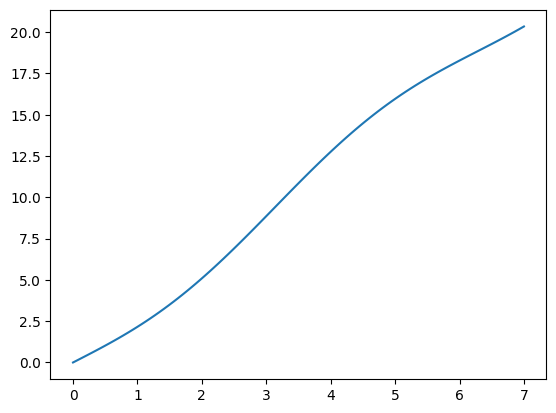

In [109]:
T=np.linspace(0,7,100)
plt.plot(T,h_num(T))
plt.show()